# MNIST Digit Recognition - Data Exploration

## 1. Import Libraries

In [1]:
# Importing the required libraries
import tensorflow as tf 
from tensorflow import keras
import numpy as np # for numeric operations
import matplotlib.pyplot as plt # to generate plots as we go
import pandas as pd # for dataframing and manipulation
import seaborn as sns
from sklearn.model_selection import train_test_split # to split the data into training and testing partitions

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# setting random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.15.0
NumPy version: 1.26.4


## 2. Load MNIST Dataset

In [2]:
# Loading thr MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Displaying some basic statistics
print("\nData Statistics:")
print(f"Training images range: [{X_train.min()}, {X_train.max()}]")
print(f"Test images range: [{X_test.min()}, {X_test.max()}]")
print(f"Unique labels: {np.unique(y_train)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Data Statistics:
Training images range: [0, 255]
Test images range: [0, 255]
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## 3. Visualize Sample Images

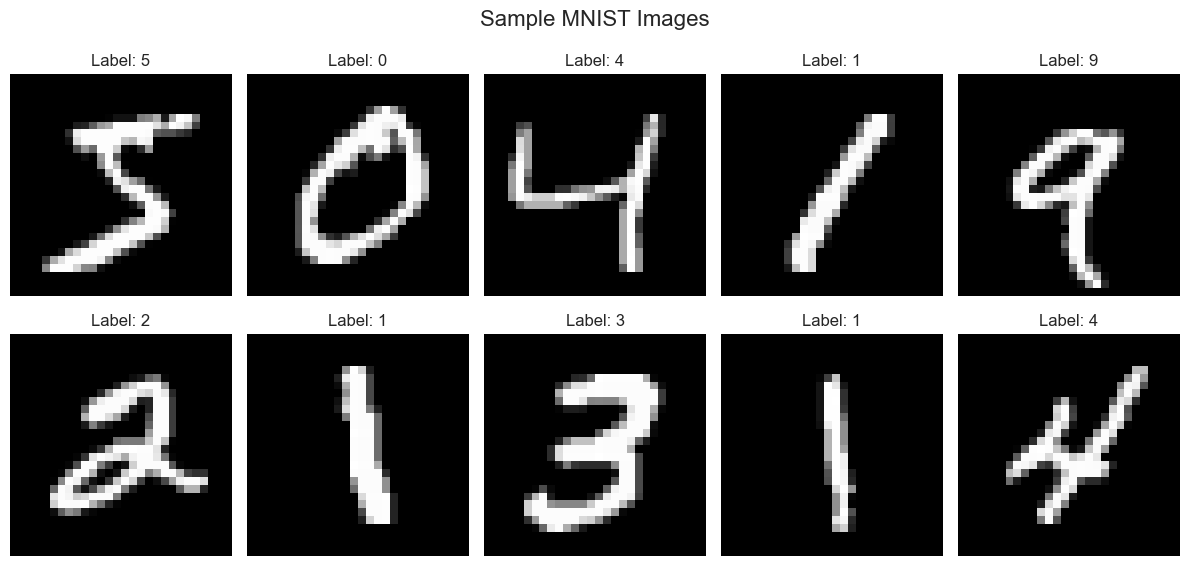

In [3]:
# Display sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

# showing 10 images from the daatset 
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.suptitle("Sample MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

## 4. Analyze Label Distribution

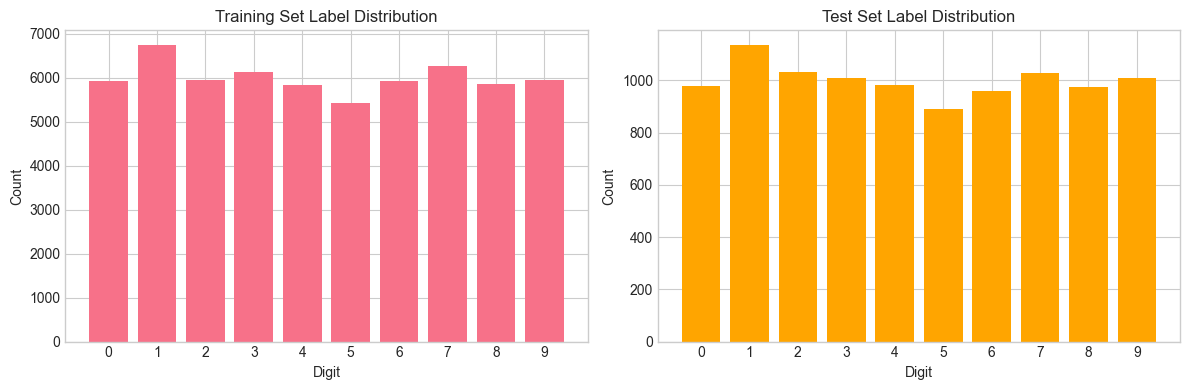

Training set distribution:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Test set distribution:
label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


In [4]:
# Create a DataFrame for label distribution
train_labels_df = pd.DataFrame(y_train, columns=['label'])
test_labels_df = pd.DataFrame(y_test, columns=['label'])

# Plot label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Training set distribution
train_counts = train_labels_df['label'].value_counts().sort_index()
ax1.bar(train_counts.index, train_counts.values)
ax1.set_title("Training Set Label Distribution")
ax1.set_xlabel("Digit")
ax1.set_ylabel("Count")
ax1.set_xticks(range(10))

# Test set distribution
test_counts = test_labels_df['label'].value_counts().sort_index()
ax2.bar(test_counts.index, test_counts.values, color='orange')
ax2.set_title("Test Set Label Distribution")
ax2.set_xlabel("Digit")
ax2.set_ylabel("Count")
ax2.set_xticks(range(10))

plt.tight_layout()
plt.show()

print("Training set distribution:")
print(train_counts)
print("\nTest set distribution:")
print(test_counts)

In [5]:
# Cell: Build the Neural Network Model
print("=== Building Neural Network Model ===")

from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

model.summary()

=== Building Neural Network Model ===
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 1093

In [ ]:
# Cell: Train the Model
print("=== Training Model ===")

# One-hot encode labels for training
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Train for 5 epochs (quick training) adding more epochs, initially was 5 but now 20
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

=== Training Model ===
Epoch 1/20
1500/1500 [==============================] - 3s 1ms/step - loss: 3.0854 - accuracy: 0.6474 - precision: 0.7350 - recall: 0.5704 - val_loss: 0.5505 - val_accuracy: 0.8465 - val_precision: 0.9494 - val_recall: 0.7547
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6640 - accuracy: 0.8230 - precision: 0.9010 - recall: 0.7614 - val_loss: 0.3328 - val_accuracy: 0.9189 - val_precision: 0.9565 - val_recall: 0.8786
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4742 - accuracy: 0.8722 - precision: 0.9254 - recall: 0.8252 - val_loss: 0.2722 - val_accuracy: 0.9317 - val_precision: 0.9615 - val_recall: 0.9023
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3973 - accuracy: 0.8918 - precision: 0.9362 - recall: 0.8556 - val_loss: 0.2243 - val_accuracy: 0.9384 - val_precision: 0.9734 - val_recall: 0.9138
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - los

In [ ]:
# Add this cell before evaluating
print("=== Checking Data Shapes ===")
print(f"X_test shape: {X_test.shape}")
print(f"X_test dtype: {X_test.dtype}")
print(f"y_test_cat shape: {y_test_cat.shape}")
print(f"y_test_cat dtype: {y_test_cat.dtype}")

# Also check model input shape
print(f"Model input shape: {model.input_shape}")

In [ ]:
# Cell: Evaluate the Model
print("=== Evaluating Model ===")

# First ensure X_test is float32
X_test = X_test.astype('float32')

# Reshape if needed (check current shape)
if len(X_test.shape) == 3:  # If shape is (n_samples, 28, 28)
    X_test_reshaped = X_test.reshape(-1, 28, 28, 1)
elif len(X_test.shape) == 2:  # If shape is (n_samples, 784)
    X_test_reshaped = X_test.reshape(-1, 28, 28, 1)
else:
    X_test_reshaped = X_test  # Already in correct shape

print(f"X_test reshaped to: {X_test_reshaped.shape}")

# Now evaluate
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_cat, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# If you want precision and recall, you need to specify them during model compilation
# For now, let's just get accuracy and loss

In [ ]:
# Cell: Evaluate the Model
print("=== Evaluating Model ===")

test_loss, test_accuracy, test_precision, test_recall = model.evaluate(
    X_test.reshape(-1, 28, 28, 1), y_test_cat, verbose=0
)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Save the notebook-trained model
model.save('notebook_model.h5')
print("Model saved as 'notebook_model.h5'")

In [ ]:
# Cell: Plot Training History
print("=== Plotting Training History ===")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Cell: Make Predictions and Visualize Results
print("=== Making Predictions ===")

import random

# Select random test samples
num_samples = 15
indices = random.sample(range(len(X_test)), num_samples)
samples = X_test[indices].reshape(-1, 28, 28, 1)
true_labels = y_test[indices]

# Make predictions
predictions = model.predict(samples, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

# Create a visualization grid
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(samples[i].reshape(28, 28), cmap='gray')
    
    # Color code based on prediction correctness
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    
    axes[i].set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", 
                     color=color, fontsize=10)
    axes[i].axis('off')
    
    # Add confidence score
    confidence = predictions[i][predicted_labels[i]] * 100
    axes[i].text(0.5, -0.15, f"Conf: {confidence:.1f}%", 
                transform=axes[i].transAxes, ha='center', fontsize=8, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.suptitle("Model Predictions on Test Samples (Green=Correct, Red=Incorrect)", 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Calculate and display statistics
correct = sum(predicted_labels == true_labels)
print(f"\nPrediction Results on {num_samples} random samples:")
print(f"Correct: {correct}/{num_samples} ({correct/num_samples*100:.1f}%)")
print(f"Incorrect: {num_samples-correct}/{num_samples} ({(num_samples-correct)/num_samples*100:.1f}%)")

# Show misclassified examples
if num_samples - correct > 0:
    print("\nMisclassified examples:")
    for i in range(num_samples):
        if predicted_labels[i] != true_labels[i]:
            confidence = predictions[i][predicted_labels[i]] * 100
            print(f"  Sample {i}: True={true_labels[i]}, Pred={predicted_labels[i]}, "
                  f"Confidence={confidence:.1f}%")